In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from sklearn.metrics import pairwise_distances

Using TensorFlow backend.


In [ ]:
img_width, img_height = 224, 224
train_data_dir = '16k_images/'
nb_train_samples = 16022
epochs = 50
batch_size = 1
asins = []
    
# Building the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(train_data_dir, 
                              target_size=(img_width, img_height), batch_size=batch_size,
                              class_mode=None, shuffle=False)

for i in generator.filenames:
    asins.append(i[2:-5])

features = model.predict_generator(generator, nb_train_samples // batch_size)
features = features.reshape((16022, 25088))
    
np.save(open('cnn_features.npy', 'wb'), features)
np.save(open('cnn_feature_asins.npy', 'wb'), np.array(asins))

In [79]:
# Loading the features and corresponding ASINS info.
features = np.load('cnn_features.npy')
asins = np.load('cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
data = pd.read_csv('apperal_data.csv')
df_asins = list(data['asin'])

Product Title:  exotic india ivory midnightblue barbie dress ikat print 
Euclidean Distance from input image: 0.0


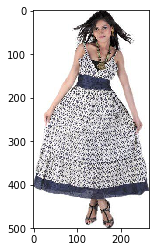

Product Title:  scotch soda maison scotch boho striped blouse multi size 3 
Euclidean Distance from input image: 52.0


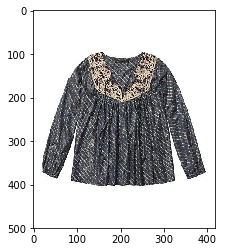

Product Title:  fylo womens sleeveless print top blouse size xl color animal dip dye 
Euclidean Distance from input image: 53.0


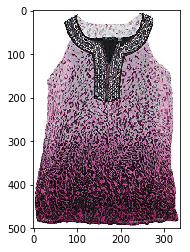

Product Title:  hanna  gracie ladies printed tank small pinkwhite fern row 
Euclidean Distance from input image: 53.0


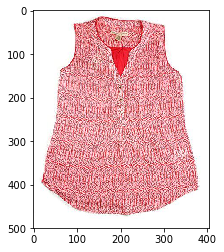

In [89]:
# Get similar products using CNN features (VGG-16)
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(features, features[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['asin', 'medium_image_url', 'title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():            
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', np.round(pdists[i]))
            plt.imshow(Image.open('16k_images/' + str(row['asin']) + '.jpeg'))
            plt.show()

get_similar_products_cnn(4761, 4) 